In [1]:
import pandas as pd
import numpy.matlib 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# importa o banco de dados
df = pd.read_parquet('/data2/raw/AngraRun_1549332405112.parq') # banco de dados com o sinal


In [10]:
# função para pegar a carga e o valor máximo do sinal 
def PICO_CARGA(NDAQ,Canal,Num_NDAQ):
    ind_NDAQ   = np.where(NDAQ == Num_NDAQ)
    Canal      = np.transpose(np.transpose(np.stack(Canal))  - np.matlib.repmat(np.mean(np.stack(Canal)[:,1:10],axis = 1),50,1))
    Amplitude  = np.max(Canal[ind_NDAQ],axis = 1)
    Carga      = np.sum(Canal[ind_NDAQ],axis = 1)
    #Amplitude  = np.max(np.stack(Canal.values[ind_NDAQ]),axis = 1)
    #Carga      = np.sum(np.stack(Canal.values[ind_NDAQ]),axis = 1
    return Amplitude,Carga 


In [11]:
Num_NDAQ = list(set(df['NDAQ Number'].values))
ST       = ['NDAQ_0','NDAQ_1','NDAQ_2','NDAQ_3'] 
STS   = ['FlashADC_1','FlashADC_2','FlashADC_3','FlashADC_4','FlashADC_5','FlashADC_6','FlashADC_7','FlashADC_8']
Dados    = {}
for i in range(0,len(ST)):
      Dados[ST[i]] = np.stack(list(map(lambda x: PICO_CARGA(df['NDAQ Number'].values,df[STS[x]],Num_NDAQ[i]),range(0,len(STS)))),axis = 1)


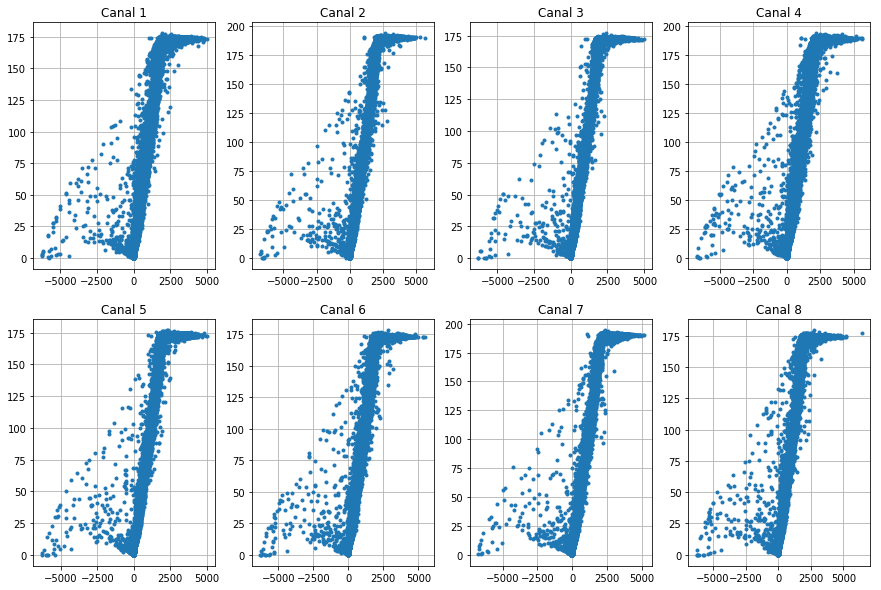

In [13]:
plt.figure(figsize=(15,10))
for j in range(0,len(STS)):
    x = np.sort(Dados['NDAQ_3'][1][j])
    plt.rcParams['figure.figsize'] = (15,4)
    k = ['Canal 1', 'Canal 2', 'Canal 3','Canal 4','Canal 5', 'Canal 6', 'Canal 7', 'Canal 8']
    plt.subplot(2, 4, j + 1)
    plt.plot(Dados['NDAQ_1'][1][j],Dados['NDAQ_1'][0][j], '.')
    plt.grid(True)
    plt.title(k[j],size=12,y=1.)
    #plt.axis([0, 5000, 0, 200])


In [14]:
NDAQ       = df['Slot Number'].values
ind_NDAQ   = np.where(NDAQ == Num_NDAQ[1])#
Canal      =  df[STS[0]] ;
Canal      = np.transpose(np.transpose(np.stack(Canal))  - np.matlib.repmat(np.mean(np.stack(Canal)[:,1:5],axis = 1),50,1))
Amplitude  = np.max(Canal,axis = 1)
Carga      = np.sum(Canal,axis = 1)
    
    #Amplitude  = np.max(np.stack(Canal[ind_NDAQ]),axis = 1)
    #Carga      = np.sum(np.stack(Canal[ind_NDAQ]),axis = 
#k = np.argsort(Dados['NDAQ_3'][1][0])
#Dados['NDAQ_3'][1][k]
#for i in range (0,len['FlashADC_1']):
#plt.plot(df['FlashADC_8'][0])


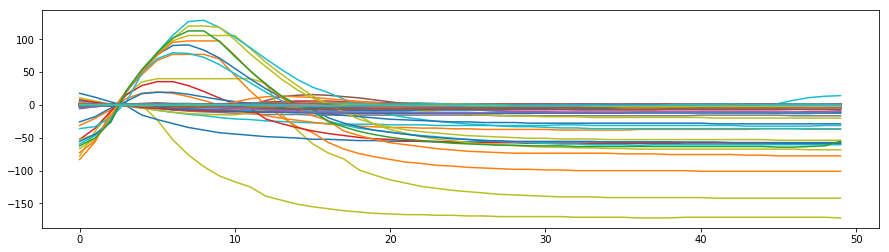

In [18]:
ind = np.where(Carga<0)
s=Canal[ind]
for i in range(0,5000):
    plt.plot(s[i])


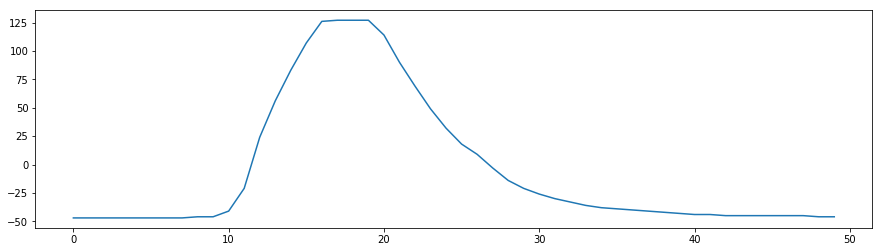

In [19]:
plt.plot(df['FlashADC_1'][0])


In [ ]:

#np.stack(list(map(lambda x: PICO_CARGA(df['Slot Number'].values,df[STS[x]],Num_NDAQ[0]),range(0,len(STS)))),axis = 1)
#PICO_CARGA(df['Slot Number'].values,df[STS[0]],Num_NDAQ[0])


In [ ]:
# plot soma das cargas por amplitude



In [ ]:
# distribuição de amplitude de uma NDAQ
DampNDAQ0            = np.reshape(Dados['NDAQ_0'][0],(Dados['NDAQ_0'][0].shape[1]*8,1))
DampNDAQ1            = np.reshape(Dados['NDAQ_1'][0],(Dados['NDAQ_1'][0].shape[1]*8,1))
plt.figure(figsize=(15,10))
histograma0,steps0 = np.histogram(DampNDAQ0,bins=np.arange(-70,150,5))
histograma1,steps1 = np.histogram(DampNDAQ1,bins=np.arange(-70,150,5))
plt.step(steps0[:-1], histograma0, label='Amplitude (ADC)',color='blue', linewidth=3)
plt.step(steps1[:-1], histograma1, label='Amplitude (ADC)',color='black', linewidth=3)
plt.grid(True)
plt.ylabel('Number of events', size=16)
plt.xlabel('Amplitude (ADC)', size=16)
plt.title('Charge Histogram', size=24,y=1.02)
plt.semilogy()
plt.legend()
